In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load, low_memory=False)

ride_df = pd.read_csv(ride_data_to_load, low_memory=False)


# Combine the data into a single dataset
Comb_city_ride_df = pd.merge(city_df,ride_df,on="city",how="inner") 


# Display the data table for preview
Comb_city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [21]:
Comb_city_ride_df = Comb_city_ride_df[["city","date","fare","ride_id","driver_count","type"]]


urban= Comb_city_ride_df.loc[Comb_city_ride_df['type'] == "Urban"]
urbangpby = urban.groupby(["city","type"])


Rural= Comb_city_ride_df.loc[Comb_city_ride_df['type'] == "Rural"]
Ruralgpby = Rural.groupby(["city","type"])


Suburban= Comb_city_ride_df.loc[Comb_city_ride_df['type'] == "Suburban"]
Suburbangpby = Suburban.groupby(["city","type"])





## Bubble Plot of Ride Sharing Data

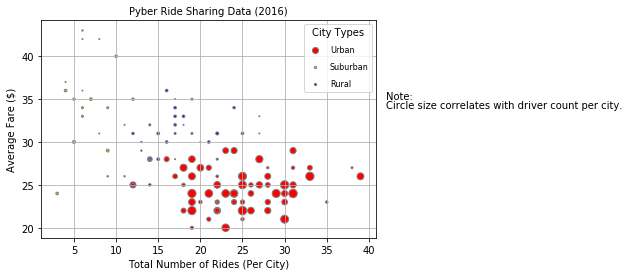

In [22]:
# Obtain the x and y coordinates for each of the three city types


g1 = (urbangpby["ride_id"].count() ,round(urbangpby["fare"].mean(),0), urbangpby["driver_count"].max())
g2 = (Ruralgpby["ride_id"].count() ,round(Ruralgpby["fare"].mean(),0),Ruralgpby["driver_count"].max())
g3 = (Suburbangpby["ride_id"].count() ,round(Suburbangpby["fare"].mean(),0),Ruralgpby["driver_count"].max())


 
data = (g1, g2, g3)
colors = ("r", "y", "b")
groups = ("Urban", "Suburban", "Rural")



for data, color, group in zip(data, colors, groups):
    x, y,size= data
    plt.scatter(x, y, alpha=1, c=color, edgecolors='gray', s=size, label=group)
    plt.legend(loc='upper right', frameon=True, labelspacing=1, title='City Types', fontsize=8)
    
    
# Create a legend
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)",fontsize=10)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# # Incorporate a text label regarding circle size
plt.text(42,35,"Note:")
plt.text(42,34,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/scatterplot.png")


In [23]:
plt.show()

## Total Fares by City Type

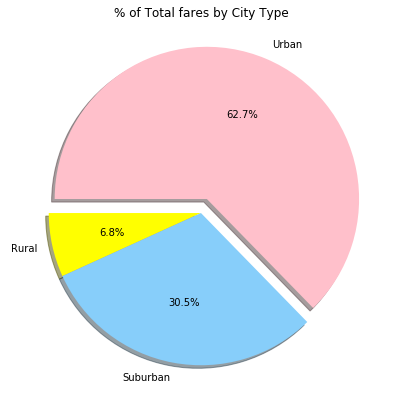

In [24]:
# Calculate Type Percents
# Calculate Ride Percents


Fare = []

cityridegpbyf = Comb_city_ride_df.groupby(["type"]).sum()

Fare = Comb_city_ride_df["fare"]

Faresum = Fare.sum()

cityridegpbyf.head()



Percentfare = cityridegpbyf/Faresum * 100

Percentfare["fare"]= Percentfare["fare"].map("{:.1f}".format)

Percentfare.head()




# Build Pie Chart

colors = ["yellow", "lightskyblue", "pink"]

labels = ["Rural","Suburban","Urban"]

explode = ( 0, 0,0.1 )

# Build Pie Chart

plt.pie(Percentfare["fare"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.title("% of Total fares by City Type")

fig = plt.gcf()
fig.set_size_inches(7,7)


# Save Figure

plt.savefig("../Images/TotalFaresbyCityType.png")




In [25]:
# Show Figure
plt.show()

## Total Rides by City Type

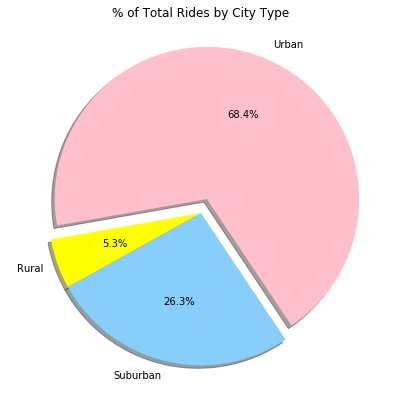

In [26]:
# Calculate Ride Percents


ride = []

cityridegpbyr = Comb_city_ride_df.groupby(["type"]).count()

ride = Comb_city_ride_df["ride_id"]

ridecount = ride.count()

cityridegpbyr.head()



Percentride = cityridegpbyr/ridecount * 100
Percentride
Percentride["ride_id"]= Percentride["ride_id"].map("{:.1f}".format)

Percentride.head()



# Build Pie Chart

colors = ["yellow", "lightskyblue", "pink"]

labels = ["Rural","Suburban","Urban"]

explode = ( 0, 0,0.1 )

# Build Pie Chart

plt.pie(Percentride["ride_id"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=190)

plt.title("% of Total Rides by City Type")

fig = plt.gcf()
fig.set_size_inches(7,7)


# Save Figure
plt.savefig("../Images/TotalRidesbyCityType.png")
plt.show()

In [27]:
# Show Figure
plt.show()

## Total Drivers by City Type

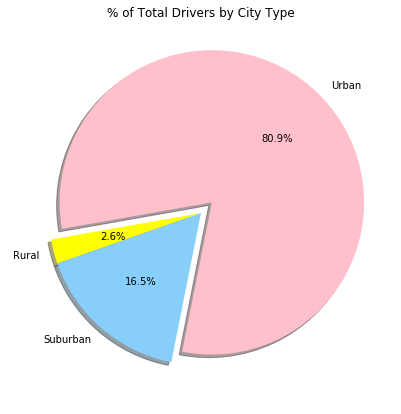

In [28]:
# Calculate Driver Percents

driver = []

cityridegpbyd = city_df.groupby(["type"]).sum()

cityridegpbyd.head()

driver = city_df["driver_count"]

drivercount = driver.sum()
drivercount
Percentdrivecount = cityridegpbyd/drivercount * 100




Percentdrivecount["driver_count"]= Percentdrivecount["driver_count"].map("{:.1f}".format)

# Percentdrivecount.head()

colors = ["yellow", "lightskyblue", "pink"]

labels = ["Rural","Suburban","Urban"]

explode = ( 0, 0,0.1 )

# Build Pie Chart

plt.pie(Percentdrivecount["driver_count"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=190)

plt.title("% of Total Drivers by City Type")

fig = plt.gcf()
fig.set_size_inches(7,7)



# # Save Figure
plt.savefig("../Images/TotalDriversbyCityType.png")




In [29]:
# Show Figure
plt.show()